<a href="https://colab.research.google.com/github/MohmedAAK/Multi-filter-layer/blob/main/code/prediction_perfromance_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#random


In [1]:
seed = 666
# python RNG
import random
random.seed(seed)
# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
# numpy RNG
import pandas as pd
import numpy as np
np.random.seed(seed)
import matplotlib.pyplot as plt


#predict before expreiment

In [2]:
import pandas as pd


In [3]:
combined_csv = pd.read_csv("/content/filter research - all flower.csv")
combined_csv

,model,result,image_size,type
0,Resnet50,0.702692,512,normal
1,Resnet101,0.671153,512,normal
2,Resnet152,0.642984,512,normal
3,Densnet201,0.733961,512,normal
4,Densnet169,0.721506,512,normal
...,...,...,...,...
103,Resnet101,0.523029,224,decreasing structure
104,Resnet152,0.509719,224,decreasing structure
105,Densnet201,0.736360,224,decreasing structure
106,Densnet169,0.733254,224,decreasing structure


In [4]:
!pip install seaborn
import seaborn as sns
combined_csv.to_csv("all_before_exp.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


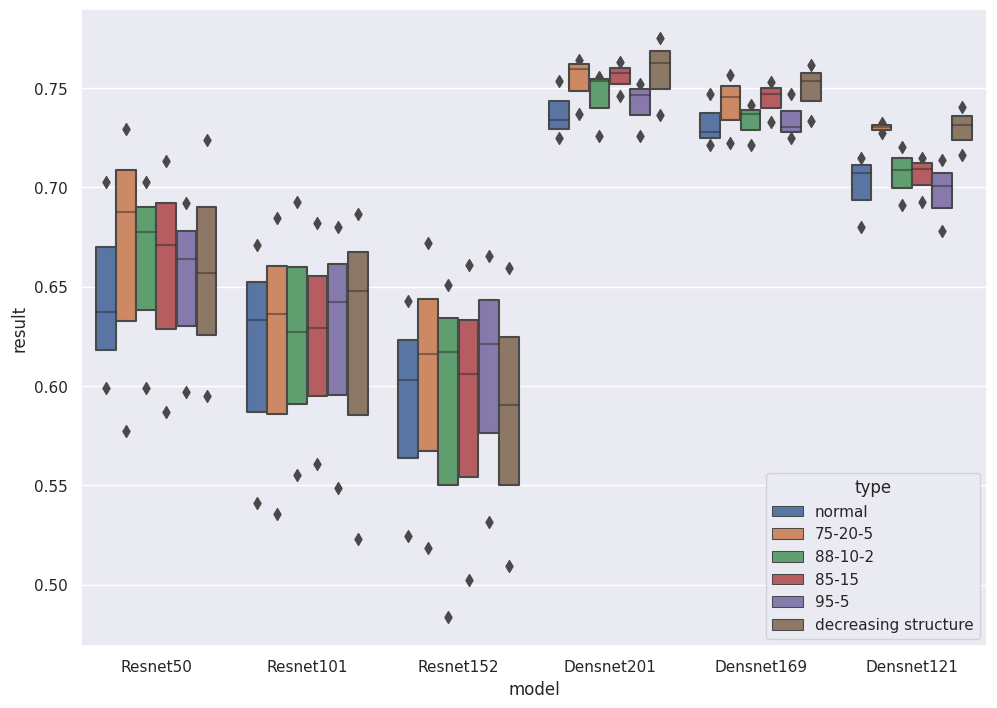

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxenplot(x="model", y="result", data=combined_csv, hue="type")

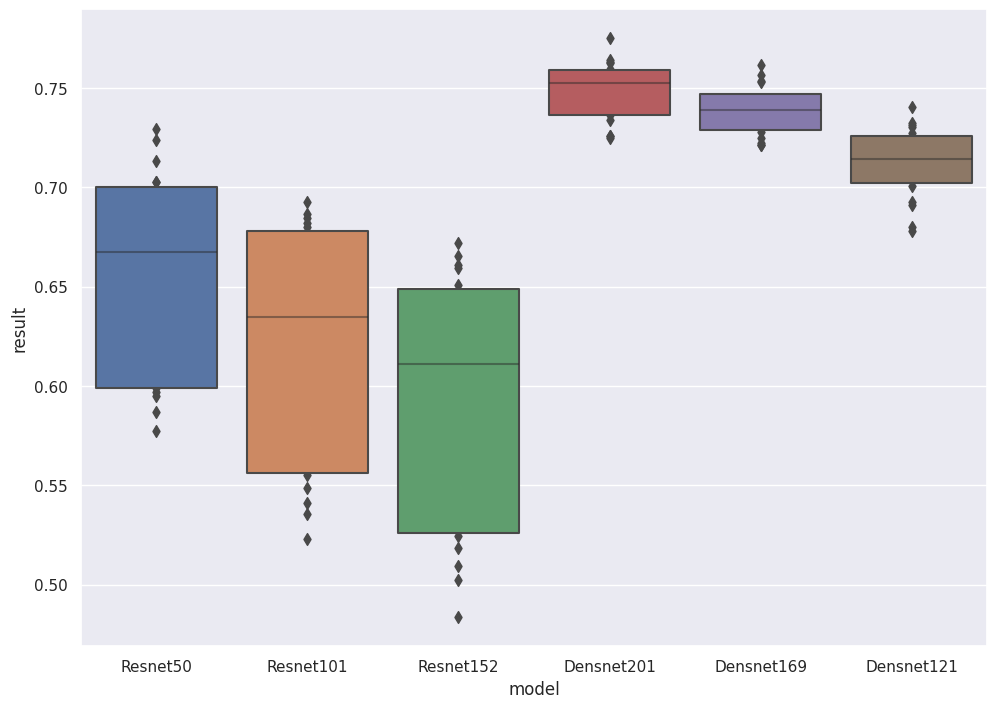

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxenplot(x="model", y="result", data=combined_csv)

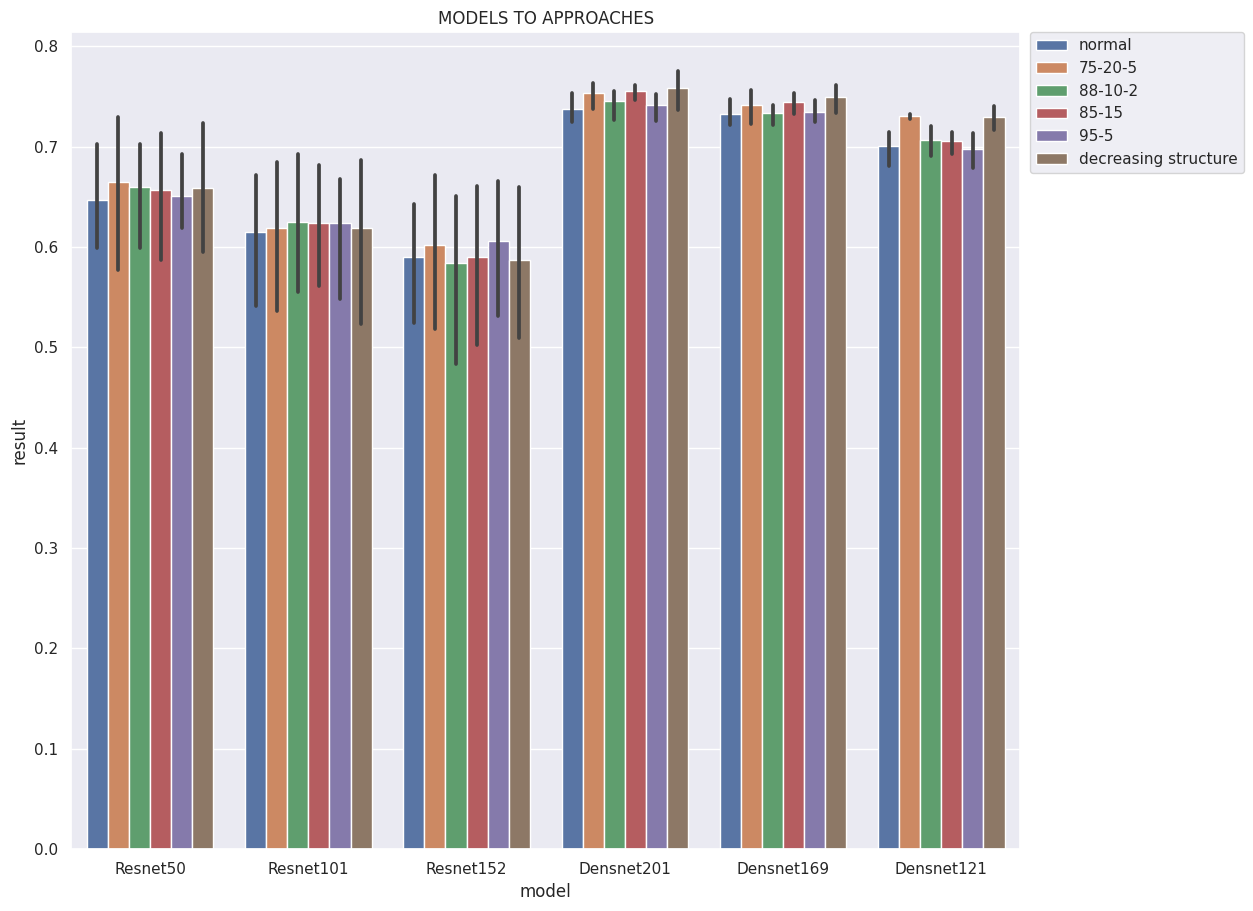

In [8]:

sns.set(rc={'figure.figsize':(12.7,9.27)})
sns.barplot(x="model", y="result", hue="type", data=combined_csv)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("MODELS TO APPROACHES")
plt.tight_layout()

<Axes: xlabel='model', ylabel='result'>

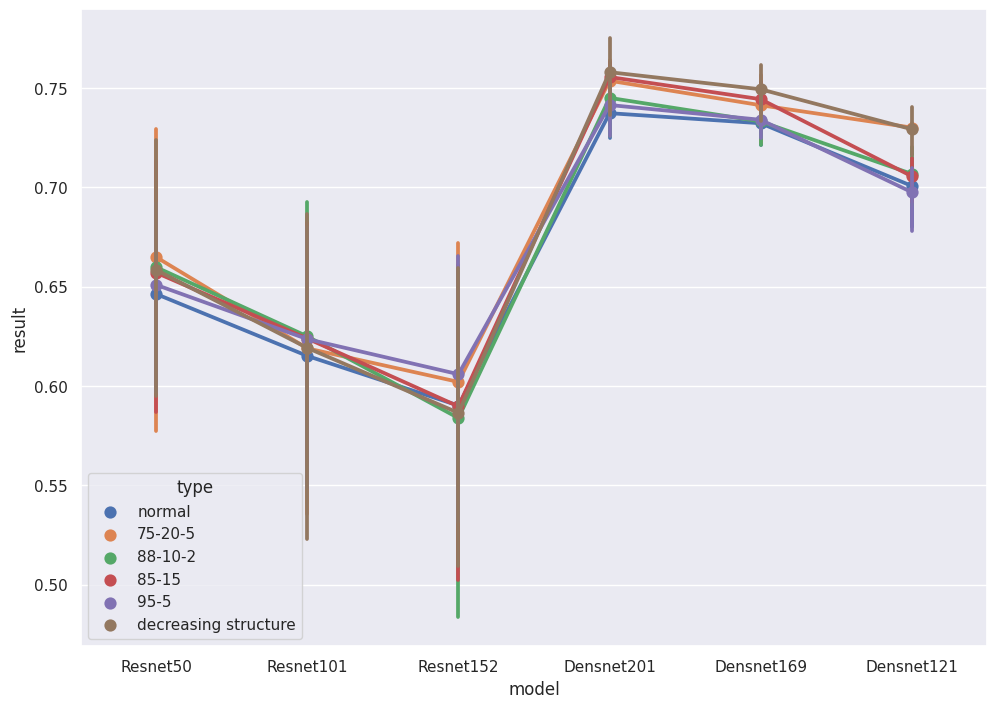

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pointplot(x="model", y="result", hue="type",  data=combined_csv)

#all

In [10]:

combined= combined_csv

In [11]:
combined

,model,result,image_size,type
0,Resnet50,0.702692,512,normal
1,Resnet101,0.671153,512,normal
2,Resnet152,0.642984,512,normal
3,Densnet201,0.733961,512,normal
4,Densnet169,0.721506,512,normal
...,...,...,...,...
103,Resnet101,0.523029,224,decreasing structure
104,Resnet152,0.509719,224,decreasing structure
105,Densnet201,0.736360,224,decreasing structure
106,Densnet169,0.733254,224,decreasing structure


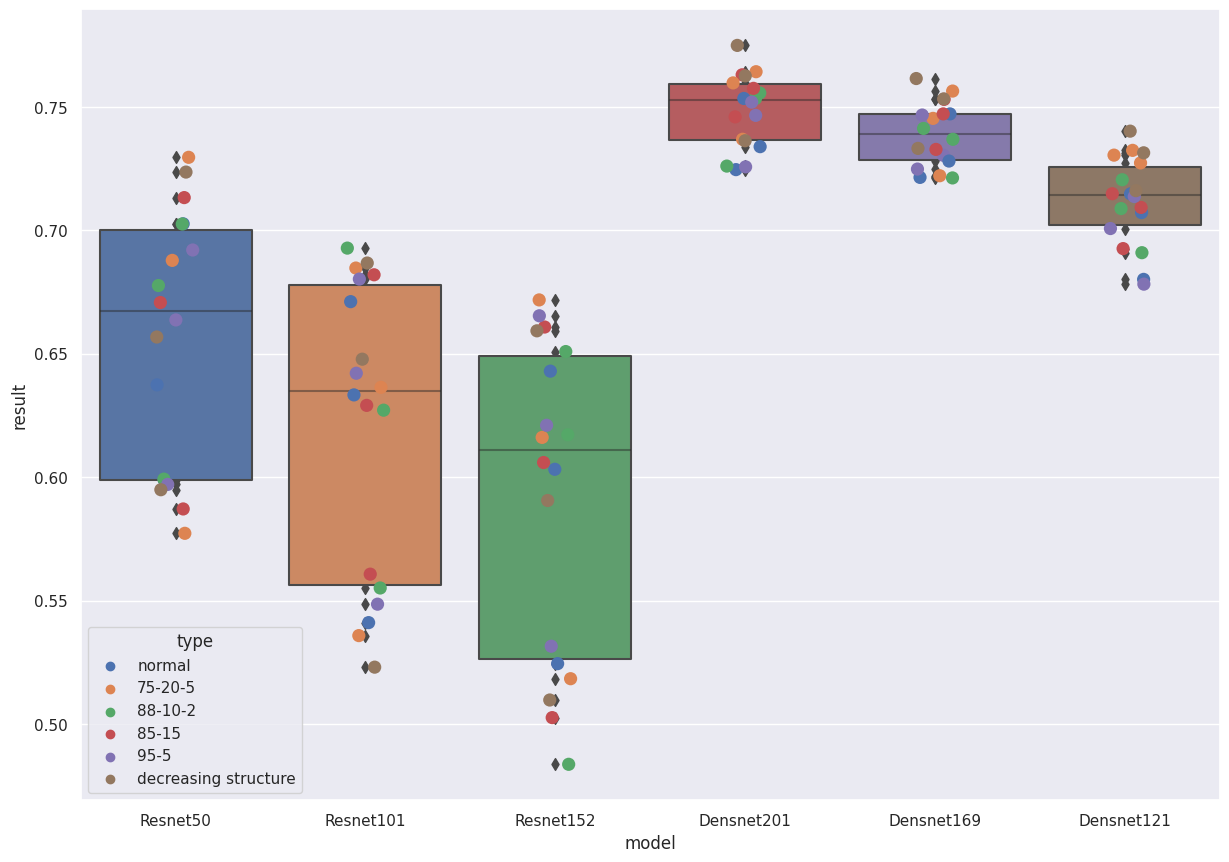

In [12]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = sns.stripplot(x='model', y="result", data=combined, jitter=0.1, size=9.5,hue="type")
ax = sns.boxenplot(x="model", y="result", data=combined)#, hue="experiment")

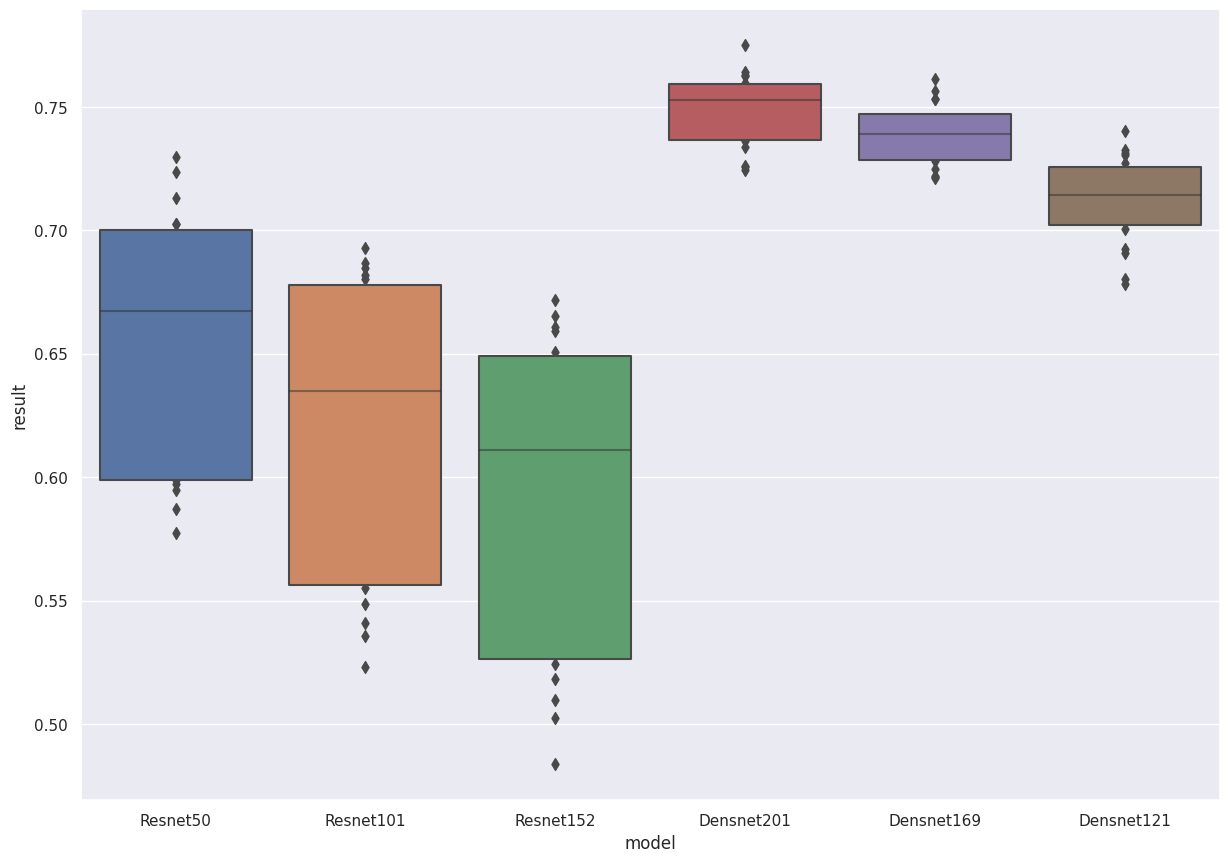

In [13]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = sns.boxenplot(x="model", y="result", data=combined)#, hue="experiment")

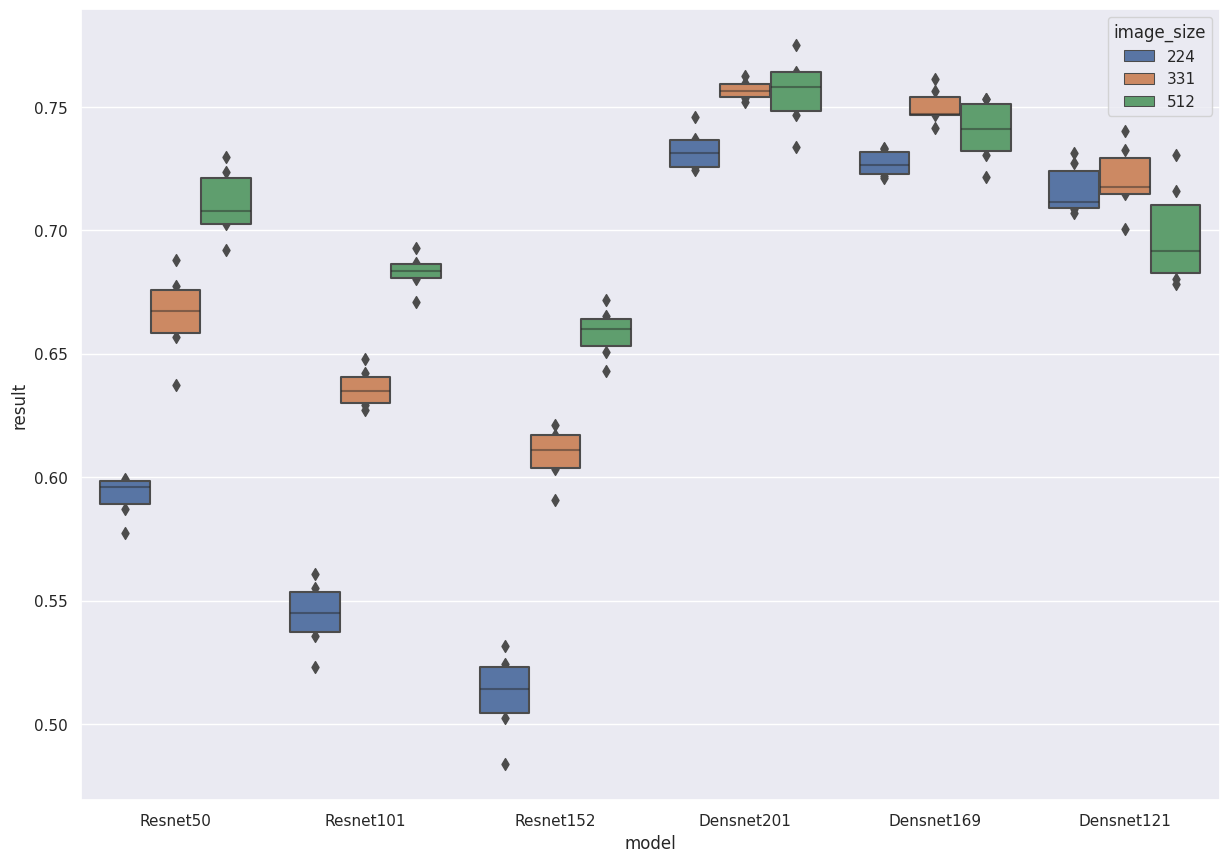

In [14]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
ax = sns.boxenplot(x="model", y="result", data=combined, hue="image_size")

In [15]:
import matplotlib.pyplot as plt
def run_plot(df,y, flds,typ):
   # CREATE NEW COLUMN OF CONCATENATED VALUES
   dfs=pd.DataFrame(df)

   dfs['_'.join(flds)] =  (pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')).values.tolist()

   # PLOT WITH hue
   if typ=="box":
     sns.boxenplot(x="model", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()
   elif typ=="bar":
     sns.barplot(x="model", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()
   elif typ=="point":
     sns.pointplot(x="model", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()
   elif typ=="point_bar":
     sns.barplot(x="model", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     print()
     sns.pointplot(x="model", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()

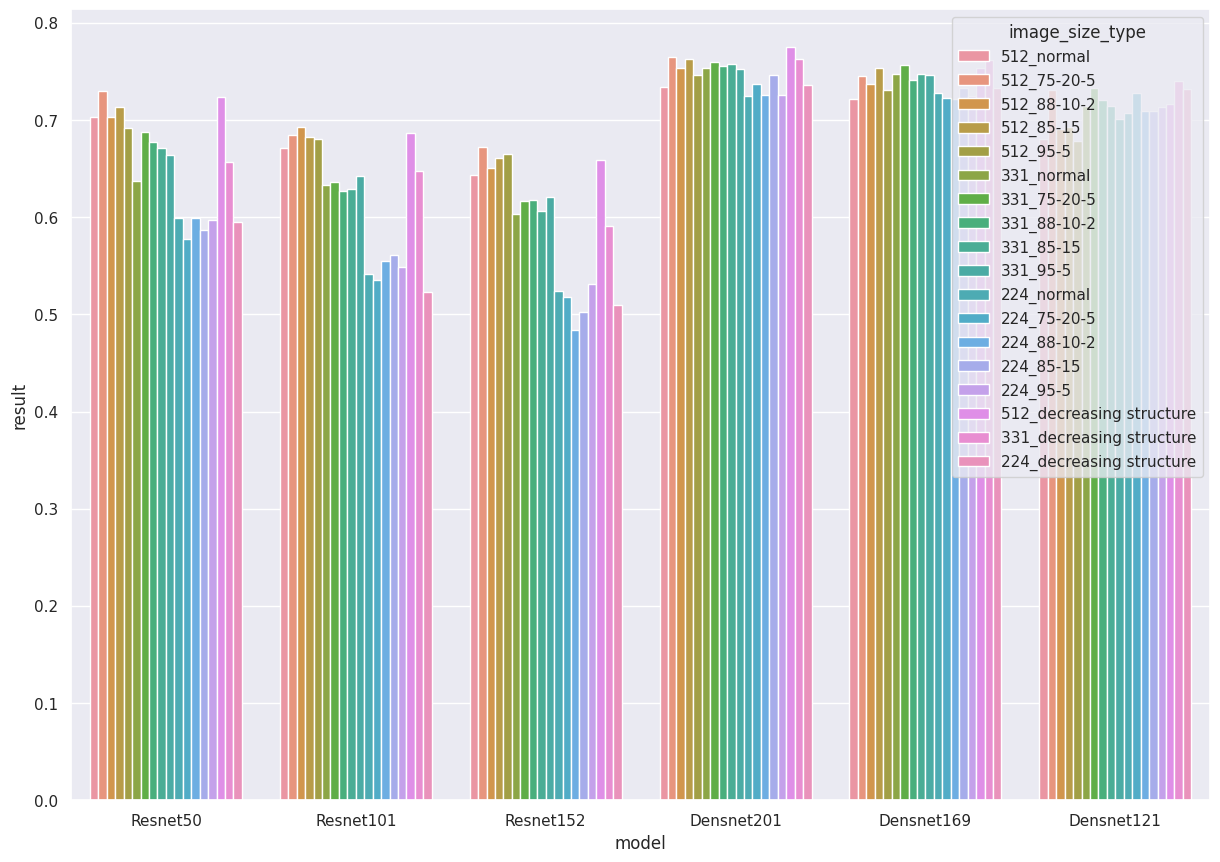

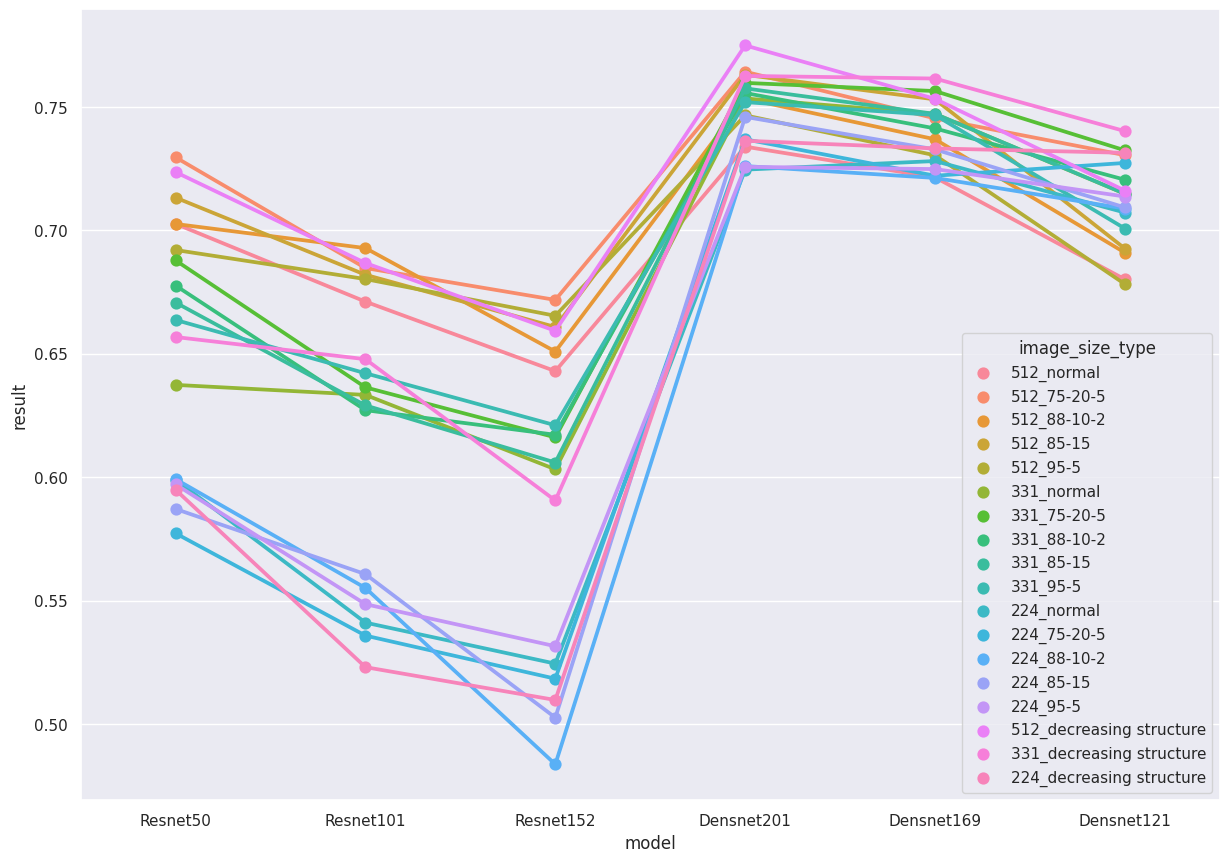

In [16]:
key_s=["result"]
for i in key_s:
  run_plot(combined,i, ['image_size', 'type'],"point_bar")

In [17]:
import matplotlib.pyplot as plt
def run_plot_app(df,y, flds,typ):
   # CREATE NEW COLUMN OF CONCATENATED VALUES
   dfs=pd.DataFrame(df)

   dfs['_'.join(flds)] =  (pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')).values.tolist()
   # PLOT WITH hue
   if typ=="box":
     sns.boxenplot(x="type", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()
   elif typ=="box_bar":
     sns.barplot(x="type", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     print()
     sns.boxenplot(x="type", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     print()


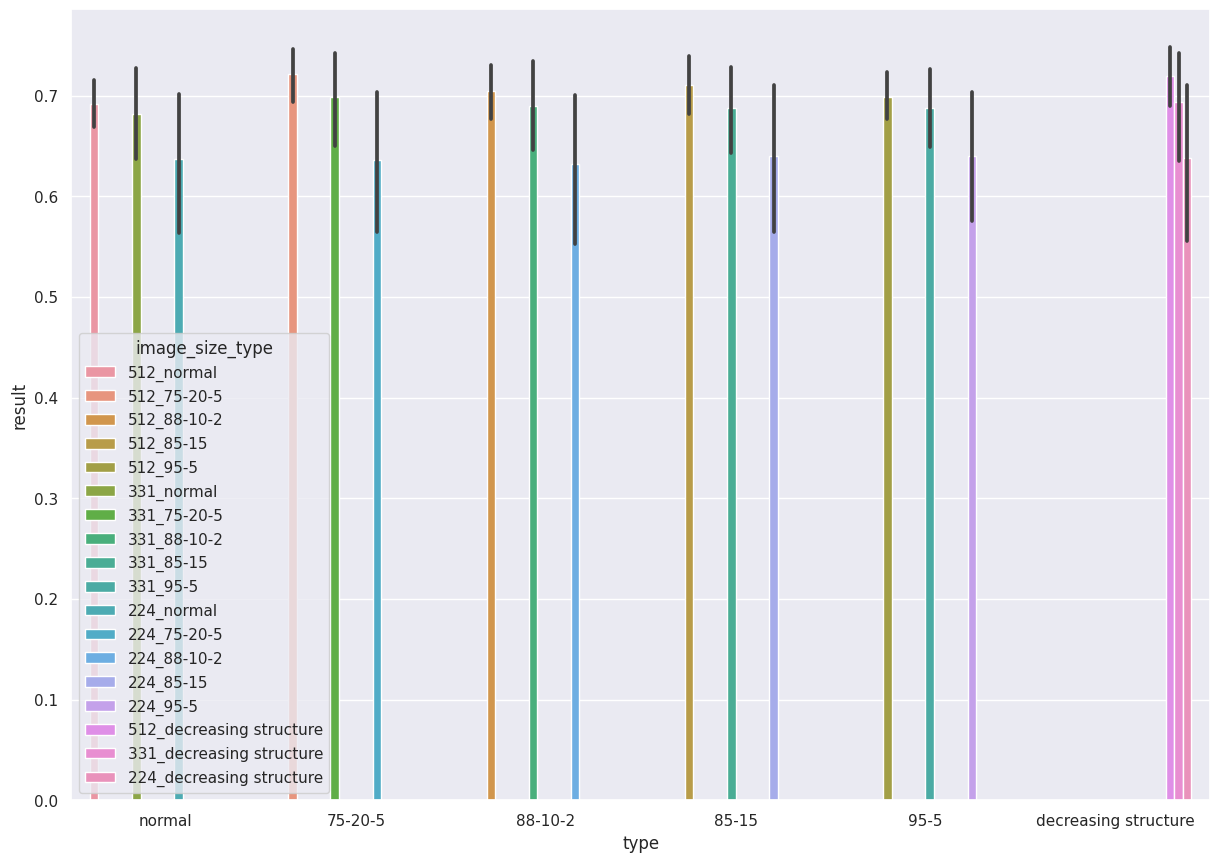

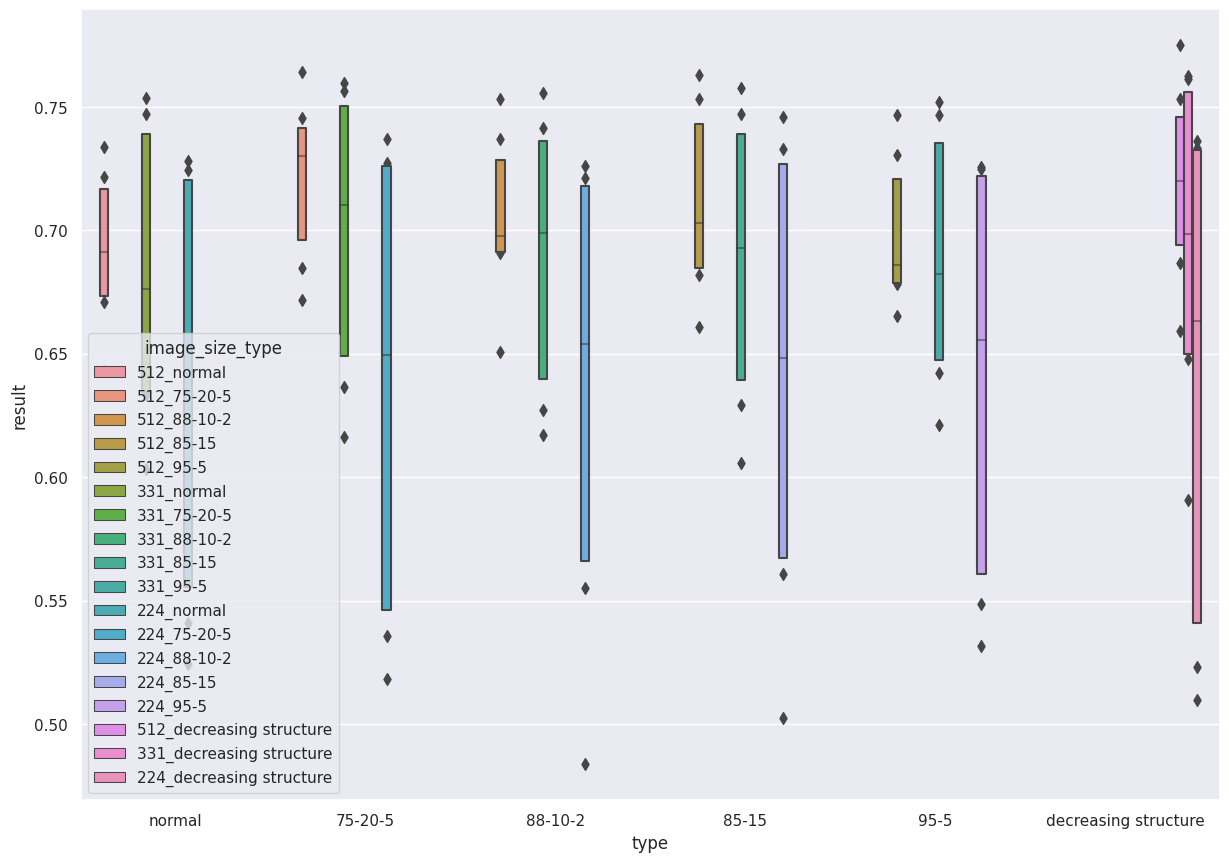

<Figure size 1470x1027 with 0 Axes>

In [18]:
key_s=["result"]
for i in key_s:
  run_plot_app(combined,i, ['image_size', 'type'],"box_bar")

In [19]:
import matplotlib.pyplot as plt
def run_plot_exp(df,y, flds,typ):
   # CREATE NEW COLUMN OF CONCATENATED VALUES
   dfs=pd.DataFrame(df)

   dfs['_'.join(flds)] =  (pd.Series(df.reindex(flds, axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')).values.tolist()
   # PLOT WITH hue
   if typ=="box":
     sns.boxenplot(x="image_size", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     plt.close()
   elif typ=="box_bar":
     sns.barplot(x="image_size", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     print()
     sns.boxenplot(x="image_size", y=y, hue='_'.join(flds), data=dfs)
     plt.show()
     plt.clf()
     print()
     sns.boxenplot(x="image_size", y=y, data=dfs)
     plt.show()
     plt.clf()
     print()


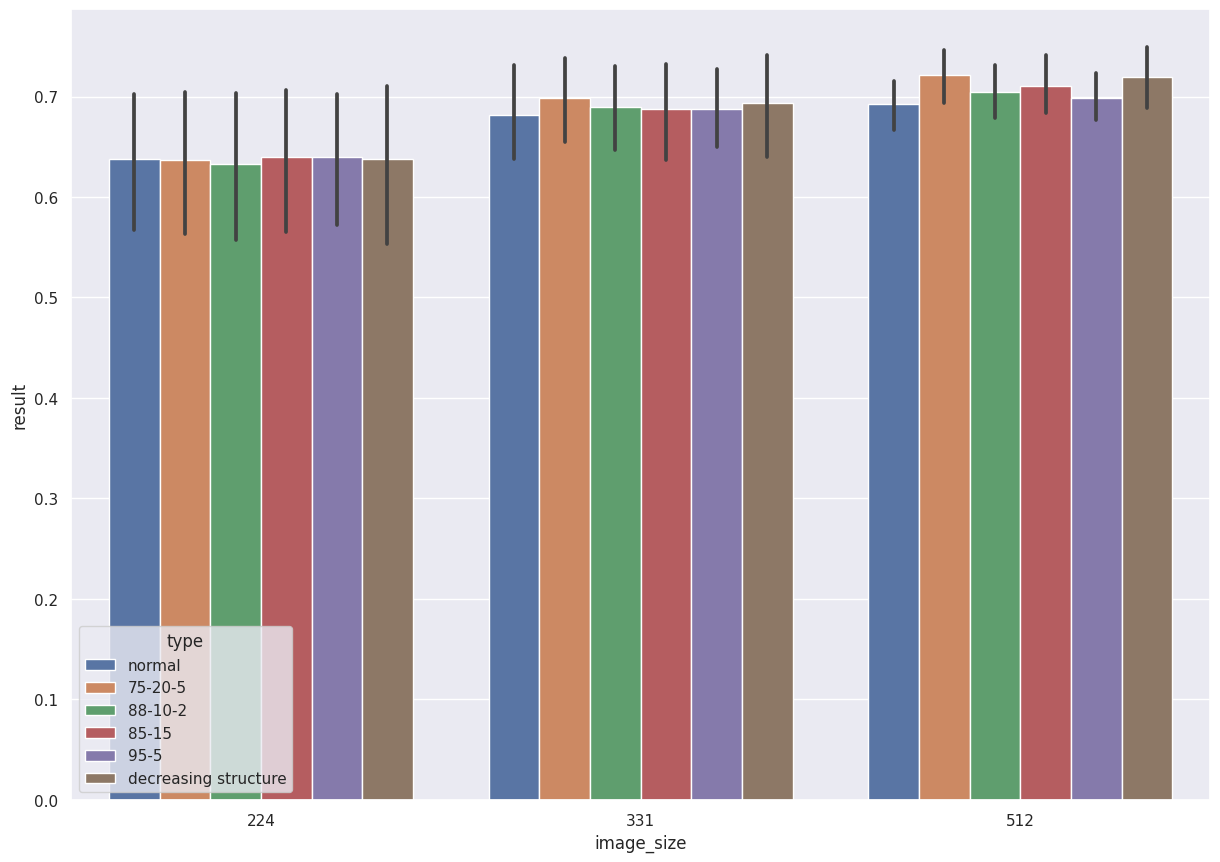

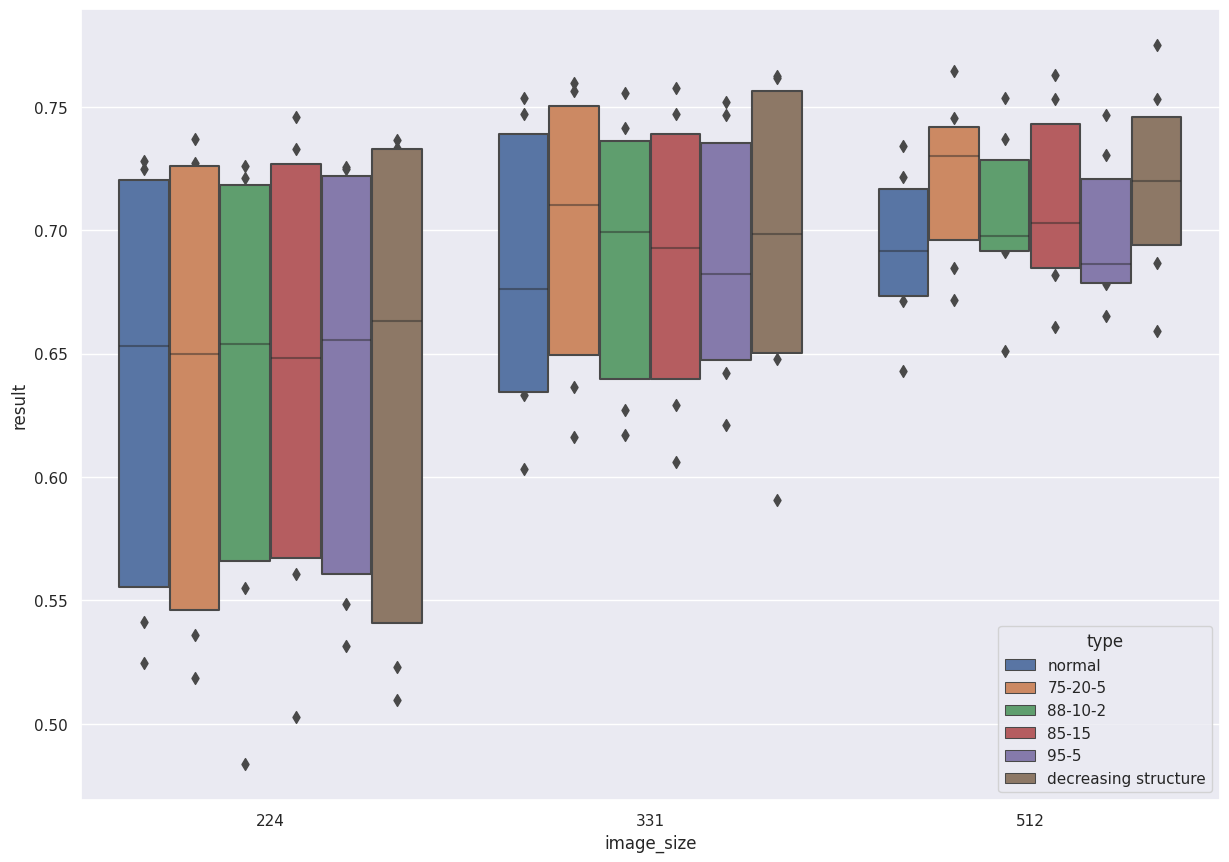

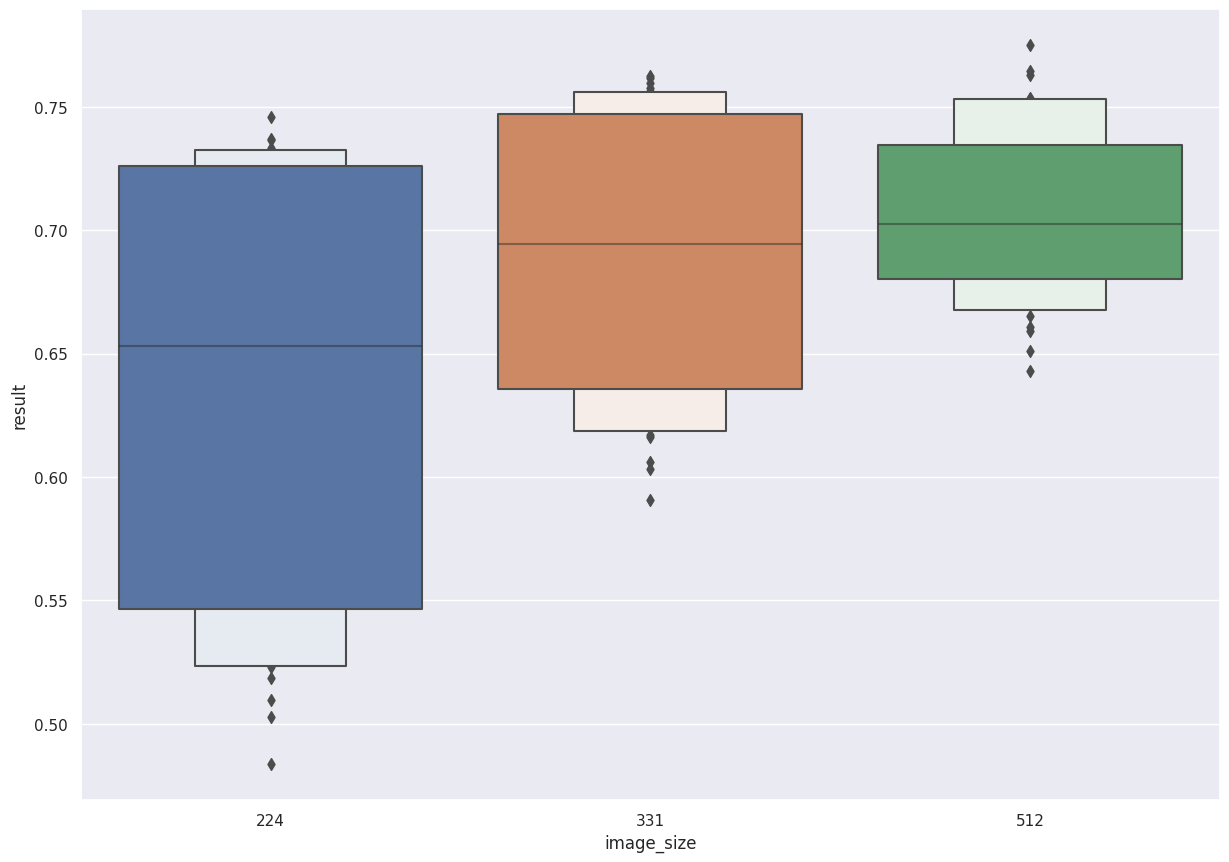

<Figure size 1470x1027 with 0 Axes>

In [20]:
key_s=["result"]
for i in key_s:
  run_plot_exp(combined,i, ['type'],"box_bar")